# NetwokX, Soft landing

Lets run some imports

In [1]:
# %matplotlib notebook

# Base libraries
import pandas as pd
import networkx as nx

# Community Algorithms
import networkx.algorithms.community as nxcom
from networkx.algorithms import bipartite

# Plotting
from matplotlib import pyplot as plt

# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

# Simple graphs

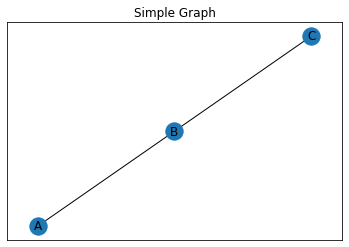

In [2]:
# Create a Graph object
# Start adding nodes
G = nx.Graph()
G.add_edge('A','B')
G.add_edge('B','C')

# Draw the graph
nx.draw_networkx(G)
plt.title('Simple Graph');

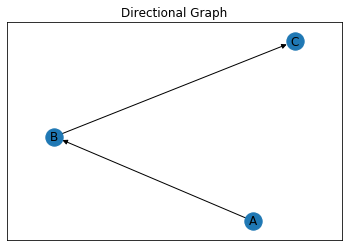

In [3]:
# Directional graph

# Create a DiGraph object
# Start adding nodes
G = nx.DiGraph()
G.add_edge('A','B')
G.add_edge('B','C')

# Draw the graph
nx.draw_networkx(G)
plt.title('Directional Graph');

# More complex structures

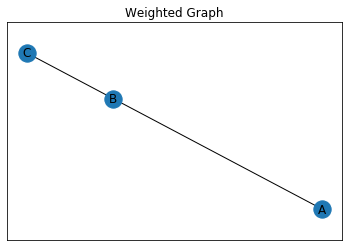

In [4]:
# Weighted graph

# Create a Simple Graph object
# Start adding nodes
G = nx.Graph()
G.add_edge('A','B', weight=6)
G.add_edge('B','C', weight=60)

# Draw the graph
nx.draw_networkx(G)
plt.title('Weighted Graph');

In [5]:
# We can oveload attributes to an adge
# There is a simple dictionary Syntax

G = nx.Graph()
G.add_edge('A','B', stam=6, whatever = 'sababa')

print("G['B'] :", G['B'])
print("G['A']['B'] :",G['A']['B']) 

# Notes
# -----
# Adding an edge that already exists updates the edge data.

# Many NetworkX algorithms designed for weighted graphs use
# an edge attribute (by default `weight`) to hold a numerical value.

G['B'] : {'A': {'stam': 6, 'whatever': 'sababa'}}
G['A']['B'] : {'stam': 6, 'whatever': 'sababa'}


B[1]:  {'A': {}, 'B': {}, 'C': {}}
B['A']:  {1: {}, 2: {}}
B['A'][1] : {}


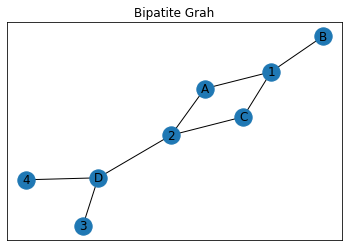

In [6]:
# Bipatite Grah

B = nx.Graph() # no seperate class for bipartite

# Declare  nodes
B.add_nodes_from(['A', 'B', 'C', 'D'], bipartite = 0) 
B.add_nodes_from([1, 2, 3, 4], bipartite = 1)

# Build egdes
B.add_edges_from([('A', 1),
                  ('A', 2),
                  ('B', 1),
                  ('C', 1),
                  ('C', 2),
                  ('D', 4),
                  ('D', 3),
                  ('D', 2)])

# Draw the graph
nx.draw_networkx(B)
plt.title('Bipatite Grah');

# Pull data
print("B[1]: ", B[1])
print("B['A']: ",B['A'])
print("B['A'][1] :", B['A'][1])

# Network Analyze

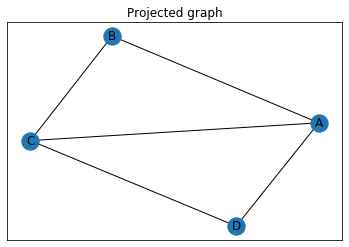

In [7]:
# Projected graph

# Select set
X = set(['A', 'B', 'C','D'])
L = bipartite.projected_graph(B, X)

# Draw the graph
nx.draw_networkx(L)
plt.title('Projected graph');

EdgeDataView([('C', 'B', {'weight': 1}), ('C', 'A', {'weight': 2}), ('C', 'D', {'weight': 1}), ('B', 'A', {'weight': 1}), ('A', 'D', {'weight': 1})])

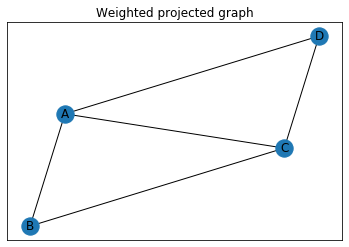

In [8]:
# Weighted projected graph

# Select set
X = set(['A', 'B', 'C','D'])
L = bipartite.weighted_projected_graph(B, X)

# Draw the graph
nx.draw_networkx(L)
plt.title('Weighted projected graph')

L.edges(data=True)

In [9]:
# Check for a single division of the network
# All the arches connect diffrets nodes groups

bipartite.sets(B)

({'A', 'B', 'C', 'D'}, {1, 2, 3, 4})

# Local clustering coeffiecient

,source,target
0,0,1
1,0,2
2,0,4
3,0,8
4,1,3
5,1,6
6,2,5
7,2,6
8,4,3
9,4,5


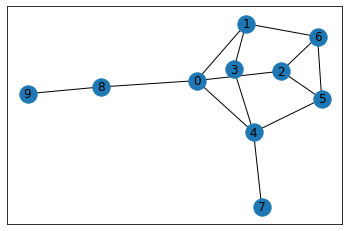

In [10]:
# Load a network from file

G = nx.read_adjlist('adjacency_list.txt', nodetype=int)

# Draw the network
nx.draw_networkx(G)
nx.to_pandas_edgelist(G)

In [11]:
# local clustering coefficient
# Give node V, the precentege of nodes connected to V,
# which are connected to at least one node connected to V.

nx.clustering(G,2)

0.3333333333333333

In [12]:
# The avarege clustering

nx.average_clustering(G)

0.1

# network charateristics

In [13]:
# Genral info

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 13
Average degree:   2.6000


In [14]:
# The center of the network
# Peripherial nodes

print ('Network center: ', nx.center(G))
print ('Network peripherial nodes: ', nx.periphery(G))

Network center:  [0]
Network peripherial nodes:  [3, 6, 5, 7, 9]


In [15]:
# Network Diameter
# Maximum distance between two nodes

nx.diameter(G)

4

In [16]:
# Is the network fully conncted?

nx.is_connected(G)

True

In [17]:
# Network density
# Edges / (Nodes*(Nodes-1))

nx.density(G)

0.28888888888888886

# Want to build "Waze" app with one line?

In [18]:
# All the paths from a to 
# For a weighted graph the calculation sums the weights between the nodes
sorted(nx.all_simple_paths(G,7,9))

[[7, 4, 0, 8, 9],
 [7, 4, 3, 1, 0, 8, 9],
 [7, 4, 3, 1, 6, 2, 0, 8, 9],
 [7, 4, 3, 1, 6, 5, 2, 0, 8, 9],
 [7, 4, 5, 2, 0, 8, 9],
 [7, 4, 5, 2, 6, 1, 0, 8, 9],
 [7, 4, 5, 6, 1, 0, 8, 9],
 [7, 4, 5, 6, 2, 0, 8, 9]]

In [19]:
nx.shortest_path(G,7,9)

[7, 4, 0, 8, 9]

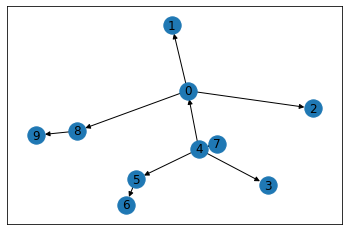

In [20]:
T = nx.bfs_tree(G,7)
nx.draw_networkx(T)

# Notice the graph became directional 